# Load data related to power electronics

In [1]:
import pandas as pd

# Load the dataset from Hugging Face's raw CSV URL
csv_url = "../EngiOpt/data/power_electronics_v0_1.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Display the first few rows
print(df.head())

# Save it locally if needed
#df.to_csv("./data/power_electronics_v0_1.csv", index=False)


         C1        C2        C3        C4        C5        C6        L1  \
0  0.000001  0.000001  0.000001  0.000001  0.000001  0.000001  0.000001   
1  0.000001  0.000001  0.000001  0.000001  0.000001  0.000001  0.000001   
2  0.000001  0.000001  0.000001  0.000001  0.000001  0.000001  0.000001   
3  0.000001  0.000001  0.000001  0.000001  0.000001  0.000001  0.000001   
4  0.000001  0.000001  0.000001  0.000001  0.000001  0.000001  0.000001   

         L2        L3   T1         g         r          e  
0  0.000001  0.000001  0.1  0.440126  0.914354  -3.903844  
1  0.000001  0.000001  0.2  0.410832  1.152453  -9.022484  
2  0.000001  0.000001  0.3  0.353193  1.521469 -14.144002  
3  0.000001  0.000001  0.4  0.256083  2.190335 -19.268402  
4  0.000001  0.000001  0.5  0.147918  3.205281 -24.395419  


# Data Analysis

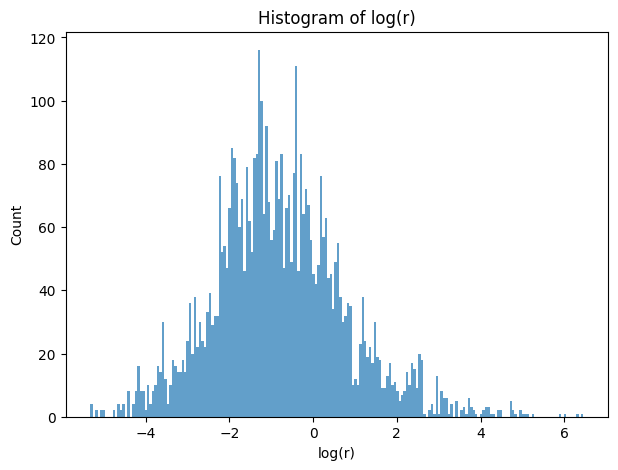

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Compute log(r + 1e-8)
log_r = np.log(df[' r'])

# Histogram
plt.figure(figsize=(7, 5))
plt.hist(log_r, bins=200, alpha=0.7)
plt.xlabel("log(r)")
plt.ylabel("Count")
plt.title("Histogram of log(r)")
plt.show()

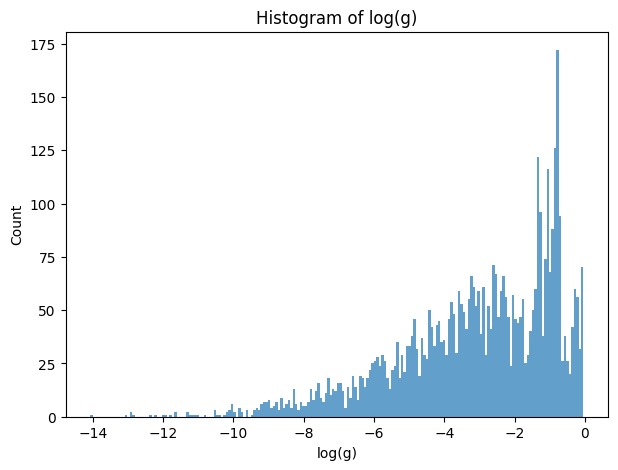

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Compute log(r + 1e-8)
log_g = np.log(df[' g'])

# Histogram
plt.figure(figsize=(7, 5))
plt.hist(log_g, bins=200, alpha=0.7)
plt.xlabel("log(g)")
plt.ylabel("Count")
plt.title("Histogram of log(g)")
plt.show()


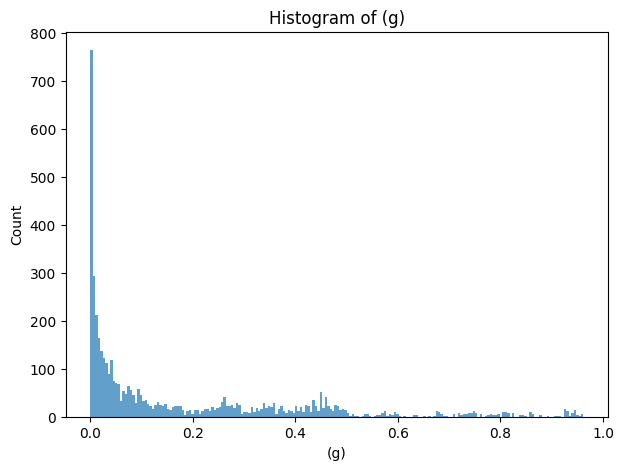

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Compute log(r + 1e-8)
g = df[' g']

# Histogram
plt.figure(figsize=(7, 5))
plt.hist(g, bins=200, alpha=0.7)
plt.xlabel("(g)")
plt.ylabel("Count")
plt.title("Histogram of (g)")
plt.show()


In [7]:
df.describe()

,C1,C2,C3,C4,C5,C6,L1,L2,L3,T1,g,r,e
count,4608.000000,4608.000000,4608.000000,4608.000000,4608.000000,4608.000000,4608.000000,4608.000000,4608.000000,4608.000000,4.608000e+03,4608.000000,4608.000000
mean,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000500,0.000500,0.000500,0.500000,1.779687e-01,2.548686,-5.418452
std,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000500,0.000500,0.000500,0.258227,2.262546e-01,17.426358,12.806794
min,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.100000,7.770340e-07,0.004893,-44.932700
25%,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.300000,1.167198e-02,0.160791,-0.455450
50%,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000500,0.000500,0.000500,0.500000,6.475145e-02,0.409126,0.882925
75%,0.000020,0.000020,0.000020,0.000020,0.000020,0.000020,0.001000,0.001000,0.001000,0.700000,2.905664e-01,1.147634,0.950271
max,0.000020,0.000020,0.000020,0.000020,0.000020,0.000020,0.001000,0.001000,0.001000,0.900000,9.619789e-01,637.193300,0.992604


# Hyperparameter tuning with ax platform and botorch in backend

## Output: g

In [1]:
from ax import optimize
from engiopt.model_pipeline import ModelPipeline
import engiopt.model_pipeline
import sys
sys.modules["model_pipeline"] = engiopt.model_pipeline
from engiopt.vae_mlp_multimodal import Args, main

def train_and_evaluate_model(hyperparams: dict) -> float:
    """
    Creates a new Args instance (using defaults that match your command-line call),
    updates it with hyperparameters from Ax (including L2 penalty),
    runs training, and returns the best validation loss.
    """
    args = Args(
        # Set to load from Hugging Face (and disable local file loading)
        huggingface_repo="IDEALLab/power_electronics_v0",
        huggingface_split="train",
        init_col="",
        opt_col="",
        target_col="DcGain",
        log_target=True,
        params_cols=["initial_design_0","initial_design_1","initial_design_2",
                     "initial_design_3","initial_design_4","initial_design_5",
                     "initial_design_6","initial_design_7","initial_design_8",
                     "initial_design_9"],
        strip_column_spaces=True,
        flatten_columns=["initial_design"],  # flatten the column for PE dataset
        lambda_lv=1e-2,
        learning_rate=1e-3,   # default; will be overwritten
        structured=False,     # plain MLP mode
        hidden_layers=2,      # default; will be overwritten
        hidden_size=128,      # default; will be overwritten
        activation="tanh",    # default; will be overwritten
        latent_dim=8,
        n_epochs=50,
        batch_size=64,        # default; will be overwritten
        patience=40,
        l2_lambda=1e-3,       # default; will be overwritten
        scale_target=True,
        track=True,
        wandb_project="shape2shape_leastV_vae_hybsm_pe_BO_g_v250406",
        seed=18,
        n_ensembles=1,
        save_model=True,
        model_output_dir="my_models",
        test_model=True
    )
    # Update hyperparameters from Ax.
    args.learning_rate = hyperparams["learning_rate"]
    args.hidden_layers = int(hyperparams["hidden_layers"])
    args.hidden_size = int(hyperparams["hidden_size"])
    args.batch_size = int(hyperparams["batch_size"])
    args.l2_lambda = hyperparams["l2_lambda"]
    args.activation = hyperparams["activation"]

    # Run training; main(args) must return the best validation loss.
    best_val_loss = main(args)
    return best_val_loss

# Run the Ax high-level optimize function.
best_parameters, best_values, experiment, model = optimize(
    parameters=[
        {
            "name": "learning_rate",
            "type": "range",
            "bounds": [1e-5, 1e-3],
            "log_scale": True,
        },
        {
            "name": "hidden_layers",
            "type": "choice",
            "values": [2, 3, 4, 5],
        },
        {
            "name": "hidden_size",
            "type": "choice",
            "values": [16, 32, 64, 128, 256],
        },
        {
            "name": "batch_size",
            "type": "choice",
            "values": [8, 16, 32, 64, 128],
        },
        {
            "name": "l2_lambda",  # L2 penalty hyperparameter.
            "type": "range",
            "bounds": [1e-6, 1e-3],
            "log_scale": True,
        },
        {
            "name": "activation",
            "type": "choice",
            "value_type": "str",
            "values": ["relu", "tanh"],
        },
    ],
    evaluation_function=train_and_evaluate_model,
    minimize=True,
    total_trials=20,
)

print("Best Parameters:", best_parameters)
print("Best Validation Loss:", best_values)


[INFO 04-06 15:42:13] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter learning_rate. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 04-06 15:42:13] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter hidden_layers. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/service/utils/instantiation.py:258: AxParameterWarning: `is_ordered` is not specified for `ChoiceParameter` "hidden_layers". Defaulting to `True`  since the parameter is not of type string.. To override this behavior (or avoid this warning), specify `is_ordered` during `ChoiceParameter` construction. Note that choice parameters with exactly 2 choices are always considered ordered and that the user-supplied `is_ordered`

[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
test_mse,▁
train_loss,█▇▇▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,██▇▅▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▂▁▁▁▁▁▁▁
epoch,49
test_mse,0.59802
train_loss,0.13118
val_loss,0.15695


[INFO 04-06 15:44:12] ax.service.managed_loop: Running optimization trial 2...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,███▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
val_loss,███▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁
epoch,49
test_mse,0.82958
train_loss,0.20492
val_loss,0.21846


[INFO 04-06 15:44:28] ax.service.managed_loop: Running optimization trial 3...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,████▇▆▆▅▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
val_loss,████▇▇▆▆▅▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,0.62272
train_loss,0.17016
val_loss,0.1845


[INFO 04-06 15:47:51] ax.service.managed_loop: Running optimization trial 4...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,█▇▅▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▇▆▅▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,0.43138
train_loss,0.1047
val_loss,0.12027


[INFO 04-06 15:48:19] ax.service.managed_loop: Running optimization trial 5...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,█▆▅▄▄▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▇▆▅▄▃▃▃▂▃▂▂▂▂▂▂▂▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,0.16993
train_loss,0.07414
val_loss,0.09601


[INFO 04-06 15:49:14] ax.service.managed_loop: Running optimization trial 6...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,██▇▇▆▆▅▅▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,██▇▆▆▅▅▄▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,0.51968
train_loss,0.13604
val_loss,0.15032


[INFO 04-06 15:52:02] ax.service.managed_loop: Running optimization trial 7...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,██▅▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▇▅▄▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,0.19858
train_loss,0.07407
val_loss,0.10157


[INFO 04-06 15:52:22] ax.service.managed_loop: Running optimization trial 8...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,█▇▆▆▆▆▆▆▆▅▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
val_loss,██▇▇▇▇▇▇▇▆▅▅▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
epoch,49
test_mse,0.71841
train_loss,0.22158
val_loss,0.23796


[INFO 04-06 15:53:37] ax.service.managed_loop: Running optimization trial 9...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,█▆▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▅▅▄▃▃▃▃▂▂▂▂▂▂▃▂▂▂▂▂▁▁▂▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,0.31328
train_loss,0.06476
val_loss,0.08951


[INFO 04-06 15:57:10] ax.service.managed_loop: Running optimization trial 10...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,██▇▇▇▆▅▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,██▇▇▆▆▅▅▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,0.5718
train_loss,0.15576
val_loss,0.16693


[INFO 04-06 15:57:56] ax.service.managed_loop: Running optimization trial 11...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,██▇▆▅▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,██▇▆▅▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,0.29298
train_loss,0.09767
val_loss,0.11695


[INFO 04-06 16:00:00] ax.service.managed_loop: Running optimization trial 12...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,████▇▆▅▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,████▇▆▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,0.39731
train_loss,0.1342
val_loss,0.14746


[INFO 04-06 16:00:15] ax.service.managed_loop: Running optimization trial 13...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/botorch/optim/optimize_mixed.py:702: OptimizationWarning: Failed to initialize using continuous relaxation. Using `sample_feasible_points` for initialization. Original error message: 3
  best_X, best_acq_val = generate_starting_points(
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anac

[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,██▇▆▅▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,██▇▅▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,0.40307
train_loss,0.12765
val_loss,0.13659


[INFO 04-06 16:02:04] ax.service.managed_loop: Running optimization trial 14...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/botorch/optim/optimize_mixed.py:702: OptimizationWarning: Failed to initialize using continuous relaxation. Using `sample_feasible_points` for initialization. Original error message: '0.887054210088719'
  best_X, best_acq_val = generate_starting_points(
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**

[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,█▅▄▄▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▆▆▅▃▃▂▂▂▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▂▁▁▁▁▁▂▁▁▁▂▂▁▂▁▂
epoch,49
test_mse,0.15714
train_loss,0.03469
val_loss,0.09358


[INFO 04-06 16:05:36] ax.service.managed_loop: Running optimization trial 15...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/botorch/optim/optimize_mixed.py:702: OptimizationWarning: Failed to initialize using continuous relaxation. Using `sample_feasible_points` for initialization. Original error message: 3
  best_X, best_acq_val = generate_starting_points(
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anac

[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,██▅▅▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▅▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,0.39836
train_loss,0.10244
val_loss,0.12599


[INFO 04-06 16:06:44] ax.service.managed_loop: Running optimization trial 16...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/botorch/optim/optimize_mixed.py:702: OptimizationWarning: Failed to initialize using continuous relaxation. Using `sample_feasible_points` for initialization. Original error message: 3
  best_X, best_acq_val = generate_starting_points(
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anac

[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,█▇▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▇▇▅▅▅▄▃▃▃▃▃▃▂▃▃▂▂▂▂▂▂▂▂▂▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,0.37846
train_loss,0.12164
val_loss,0.13825


[INFO 04-06 16:07:08] ax.service.managed_loop: Running optimization trial 17...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/botorch/optim/optimize_mixed.py:702: OptimizationWarning: Failed to initialize using continuous relaxation. Using `sample_feasible_points` for initialization. Original error message: 1
  best_X, best_acq_val = generate_starting_points(
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anac

[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,████▇▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,████▇▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,0.48834
train_loss,0.1404
val_loss,0.15818


[INFO 04-06 16:10:43] ax.service.managed_loop: Running optimization trial 18...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/botorch/optim/optimize_mixed.py:702: OptimizationWarning: Failed to initialize using continuous relaxation. Using `sample_feasible_points` for initialization. Original error message: 0
  best_X, best_acq_val = generate_starting_points(
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anac

[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██
test_mse,▁
train_loss,█▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▆▅▅▄▄▃▂▃▂▂▂▂▂▃▂▂▂▂▁▁▁▂▁▁▁▂▁▁▁▁▁▁▁▁▁▂▁▁▁
epoch,49
test_mse,0.34052
train_loss,0.08422
val_loss,0.09774


[INFO 04-06 16:14:17] ax.service.managed_loop: Running optimization trial 19...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/botorch/optim/optimize_mixed.py:702: OptimizationWarning: Failed to initialize using continuous relaxation. Using `sample_feasible_points` for initialization. Original error message: 3
  best_X, best_acq_val = generate_starting_points(
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anac

[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,█▆▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▆▅▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,0.23109
train_loss,0.05345
val_loss,0.08793


[INFO 04-06 16:16:09] ax.service.managed_loop: Running optimization trial 20...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/botorch/optim/optimize_mixed.py:702: OptimizationWarning: Failed to initialize using continuous relaxation. Using `sample_feasible_points` for initialization. Original error message: 3
  best_X, best_acq_val = generate_starting_points(
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anac

[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,█▆▅▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
val_loss,█▆▄▃▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▂▁▁▁▁▁▁▂▁▁▁▁▁▁▁▂▁▁▂▁▁
epoch,49
test_mse,0.21943
train_loss,0.03111
val_loss,0.09821


Best Parameters: {'learning_rate': 0.00035690846623008917, 'hidden_layers': 4, 'hidden_size': 256, 'batch_size': 16, 'l2_lambda': 1e-06, 'activation': 'tanh'}
Best Validation Loss: ({'objective': 0.08386667155921046}, {'objective': {'objective': 9.70028912922435e-06}})


# Hyperparameter tuning with ax platform and botorch in backend

## Output: r

In [1]:
from ax import optimize
from engiopt.model_pipeline import ModelPipeline
import engiopt.model_pipeline
import sys
sys.modules["model_pipeline"] = engiopt.model_pipeline
from engiopt.vae_mlp_multimodal import Args, main

def train_and_evaluate_model(hyperparams: dict) -> float:
    """
    Creates a new Args instance (using defaults that match your command-line call),
    updates it with hyperparameters from Ax (including L2 penalty),
    runs training, and returns the best validation loss.
    """
    args = Args(
        # Set to load from Hugging Face (and disable local file loading)
        huggingface_repo="IDEALLab/power_electronics_v0",
        huggingface_split="train",
        init_col="",
        opt_col="",
        target_col="Voltage_Ripple",
        log_target=True,
        params_cols=["initial_design_0","initial_design_1","initial_design_2",
                     "initial_design_3","initial_design_4","initial_design_5",
                     "initial_design_6","initial_design_7","initial_design_8",
                     "initial_design_9"],
        strip_column_spaces=True,
        flatten_columns=["initial_design"],  # flatten the column for PE dataset
        lambda_lv=1e-2,
        learning_rate=1e-3,   # default; will be overwritten
        structured=False,     # plain MLP mode
        hidden_layers=2,      # default; will be overwritten
        hidden_size=128,      # default; will be overwritten
        activation="tanh",    # default; will be overwritten
        latent_dim=8,
        n_epochs=50,
        batch_size=64,        # default; will be overwritten
        patience=40,
        l2_lambda=1e-3,       # default; will be overwritten
        scale_target=True,
        track=True,
        wandb_project="shape2shape_leastV_vae_hybsm_pe_BO_r_v250406",
        seed=18,
        n_ensembles=1,
        save_model=True,
        model_output_dir="my_models",
        test_model=True
    )
    # Update hyperparameters from Ax.
    args.learning_rate = hyperparams["learning_rate"]
    args.hidden_layers = int(hyperparams["hidden_layers"])
    args.hidden_size = int(hyperparams["hidden_size"])
    args.batch_size = int(hyperparams["batch_size"])
    args.l2_lambda = hyperparams["l2_lambda"]
    args.activation = hyperparams["activation"]

    # Run training; main(args) must return the best validation loss.
    best_val_loss = main(args)
    return best_val_loss

# Run the Ax high-level optimize function.
best_parameters, best_values, experiment, model = optimize(
    parameters=[
        {
            "name": "learning_rate",
            "type": "range",
            "bounds": [1e-5, 1e-3],
            "log_scale": True,
        },
        {
            "name": "hidden_layers",
            "type": "choice",
            "values": [2, 3, 4, 5],
        },
        {
            "name": "hidden_size",
            "type": "choice",
            "values": [16, 32, 64, 128, 256],
        },
        {
            "name": "batch_size",
            "type": "choice",
            "values": [8, 16, 32, 64, 128],
        },
        {
            "name": "l2_lambda",  # L2 penalty hyperparameter.
            "type": "range",
            "bounds": [1e-6, 1e-3],
            "log_scale": True,
        },
        {
            "name": "activation",
            "type": "choice",
            "value_type": "str",
            "values": ["relu", "tanh"],
        },
    ],
    evaluation_function=train_and_evaluate_model,
    minimize=True,
    total_trials=20,
)

print("Best Parameters:", best_parameters)
print("Best Validation Loss:", best_values)


[INFO 04-06 18:46:50] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter learning_rate. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 04-06 18:46:50] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter hidden_layers. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/service/utils/instantiation.py:258: AxParameterWarning: `is_ordered` is not specified for `ChoiceParameter` "hidden_layers". Defaulting to `True`  since the parameter is not of type string.. To override this behavior (or avoid this warning), specify `is_ordered` during `ChoiceParameter` construction. Note that choice parameters with exactly 2 choices are always considered ordered and that the user-supplied `is_ordered`

[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,█▅▄▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▅▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,2709.47461
train_loss,0.09749
val_loss,0.10796


[INFO 04-06 18:48:09] ax.service.managed_loop: Running optimization trial 2...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,█▇▆▅▅▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▇▆▅▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,2795.70947
train_loss,0.20064
val_loss,0.20643


[INFO 04-06 18:48:41] ax.service.managed_loop: Running optimization trial 3...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,█▇▅▅▅▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁▁
val_loss,█▇▅▅▅▅▅▅▅▅▅▅▅▅▄▄▄▄▄▄▄▄▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁
epoch,49
test_mse,2785.50562
train_loss,0.15439
val_loss,0.15979


[INFO 04-06 18:51:12] ax.service.managed_loop: Running optimization trial 4...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,█▆▅▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▆▄▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,2688.36011
train_loss,0.07879
val_loss,0.10175


[INFO 04-06 18:51:32] ax.service.managed_loop: Running optimization trial 5...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,█▆▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▅▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,2690.15845
train_loss,0.08066
val_loss,0.10665


[INFO 04-06 18:51:51] ax.service.managed_loop: Running optimization trial 6...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,█▆▆▆▆▆▆▅▅▄▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,███▇▇▇▇▇▆▄▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,2771.62891
train_loss,0.13091
val_loss,0.14109


[INFO 04-06 18:55:14] ax.service.managed_loop: Running optimization trial 7...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_mse,▁
train_loss,█▆▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▁▁
val_loss,█▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▂▂▂▁
epoch,49
test_mse,2789.67627
train_loss,0.15903
val_loss,0.16376


[INFO 04-06 18:55:36] ax.service.managed_loop: Running optimization trial 8...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,█▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▇▇▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▃▂▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁
epoch,49
test_mse,2699.28003
train_loss,0.0984
val_loss,0.10615


[INFO 04-06 18:56:35] ax.service.managed_loop: Running optimization trial 9...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_mse,▁
train_loss,█▇▆▆▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
val_loss,█▅▄▃▂▂▃▂▂▂▁▂▁▂▂▂▄▃▂▃▂▃▂▃▄▃▄▅▅▄▅▅▇▆▆▅▆▆▅▆
epoch,49
test_mse,2875.86304
train_loss,0.02326
val_loss,0.11435


[INFO 04-06 18:59:32] ax.service.managed_loop: Running optimization trial 10...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,██▇▇▇▆▆▅▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,██▇▇▇▆▅▅▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,2796.70068
train_loss,0.20137
val_loss,0.20711


[INFO 04-06 18:59:53] ax.service.managed_loop: Running optimization trial 11...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇██
test_mse,▁
train_loss,█▇▇▇▇▇▇▇▆▆▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,██████▇▇▇▆▄▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,2769.4314
train_loss,0.12929
val_loss,0.13711


[INFO 04-06 19:00:31] ax.service.managed_loop: Running optimization trial 12...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:439: UserWarning: Encountered exception in computing model fit quality: RandomModelBridge does not support prediction.
  warn("Encountered exception in computing model fit quality: " + str(e))


[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_mse,▁
train_loss,█▅▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▅▄▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,2672.46826
train_loss,0.07697
val_loss,0.09977


[INFO 04-06 19:01:03] ax.service.managed_loop: Running optimization trial 13...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/botorch/optim/optimize_mixed.py:702: OptimizationWarning: Failed to initialize using continuous relaxation. Using `sample_feasible_points` for initialization. Original error message: '0.5220918031591297'
  best_X, best_acq_val = generate_starting_points(
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(*

[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,█▆▆▆▅▅▅▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
val_loss,█▇▅▄▄▄▄▃▃▂▂▂▂▁▅▁▂▁▂▁▁▂▂▁▁▃▂▃▂▃▂▃▂▃▂▃▃▃▂▃
epoch,49
test_mse,2717.71216
train_loss,0.03957
val_loss,0.121


[INFO 04-06 19:04:50] ax.service.managed_loop: Running optimization trial 14...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/botorch/optim/optimize_mixed.py:702: OptimizationWarning: Failed to initialize using continuous relaxation. Using `sample_feasible_points` for initialization. Original error message: 0
  best_X, best_acq_val = generate_starting_points(
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anac

[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,█▆▆▅▅▅▄▄▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
val_loss,▆▄▅▃▄▄▁▂▂▂▁▂▂▃▃▃▄▃▃▄▅▆▅▅▅▆█▅▇▆▆▇▆▇▄▇▇▆▆▇
epoch,49
test_mse,2894.71021
train_loss,0.01172
val_loss,0.11589


[INFO 04-06 19:06:59] ax.service.managed_loop: Running optimization trial 15...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/botorch/optim/optimize_mixed.py:702: OptimizationWarning: Failed to initialize using continuous relaxation. Using `sample_feasible_points` for initialization. Original error message: '0.43514098867117884'
  best_X, best_acq_val = generate_starting_points(
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(

[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,█▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▆▅▄▃▄▃▃▂▂▂▂▂▂▃▂▂▂▂▁▂▂▁▁▁▁▁▁▂▂▁▂▁▂▁▁▂▂▂▁
epoch,49
test_mse,2549.23438
train_loss,0.07524
val_loss,0.09241


[INFO 04-06 19:07:37] ax.service.managed_loop: Running optimization trial 16...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/botorch/optim/optimize_mixed.py:702: OptimizationWarning: Failed to initialize using continuous relaxation. Using `sample_feasible_points` for initialization. Original error message: '0.41886720235846875'
  best_X, best_acq_val = generate_starting_points(
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(

[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██
test_mse,▁
train_loss,█▅▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▄▃▃▃▂▃▂▂▂▂▂▁▂▂▂▁▁▂▁▂▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁
epoch,49
test_mse,2582.96948
train_loss,0.0768
val_loss,0.09403


[INFO 04-06 19:09:46] ax.service.managed_loop: Running optimization trial 17...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/botorch/optim/optimize_mixed.py:702: OptimizationWarning: Failed to initialize using continuous relaxation. Using `sample_feasible_points` for initialization. Original error message: '0.4393068948436022'
  best_X, best_acq_val = generate_starting_points(
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(*

[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_mse,▁
train_loss,█▆▆▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
val_loss,█▆▅▅▃▃▃▂▁▃▂▁▂▂▂▂▃▃▄▃▅▄▄▄▅▅▅█▆▅▆▅▇▅▅▅▆▆▆▆
epoch,49
test_mse,3763.16846
train_loss,0.01065
val_loss,0.1127


[INFO 04-06 19:10:55] ax.service.managed_loop: Running optimization trial 18...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/botorch/optim/optimize_mixed.py:702: OptimizationWarning: Failed to initialize using continuous relaxation. Using `sample_feasible_points` for initialization. Original error message: '0.4373819866755191'
  best_X, best_acq_val = generate_starting_points(
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(*

[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,█▅▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▆▆▅▅▅▄▅▄▅▄▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▂▁▁▁▁▁
epoch,49
test_mse,2711.28711
train_loss,0.093
val_loss,0.09903


[INFO 04-06 19:14:35] ax.service.managed_loop: Running optimization trial 19...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/botorch/optim/optimize_mixed.py:702: OptimizationWarning: Failed to initialize using continuous relaxation. Using `sample_feasible_points` for initialization. Original error message: 3
  best_X, best_acq_val = generate_starting_points(
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anac

[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_mse,▁
train_loss,█▅▄▄▄▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
val_loss,█▅▄▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▁▂▂▂▃▂▂▂
epoch,49
test_mse,2617.45581
train_loss,0.05145
val_loss,0.1086


[INFO 04-06 19:18:36] ax.service.managed_loop: Running optimization trial 20...
/opt/anaconda3/envs/engibench/lib/python3.11/site-packages/botorch/optim/optimize_mixed.py:702: OptimizationWarning: Failed to initialize using continuous relaxation. Using `sample_feasible_points` for initialization. Original error message: '0.42529189671618867'
  best_X, best_acq_val = generate_starting_points(
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(**changes)
/opt/anaconda3/envs/engibench/lib/python3.11/dataclasses.py:1501: RuntimeWarning: If using a 2-dim `batch_initial_conditions` botorch will default to old behavior of ignoring `num_restarts` and just use the given `batch_initial_conditions` by setting `raw_samples` to None.
  return obj.__class__(

[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain  \
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767   
1  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.537095   
2  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  2.131255   
3  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  4.616109   
4  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  6.372511   

    Voltage_Ripple  
0         0.344192  
1         0.536778  
2         0.646142  
3         0.655922  
4         0.558091  
[DataPreprocessor] Flattened columns: Index(['DcGain', 'Voltage_Ripple', 'initial_design_0', 'initial_design_1',
       'initial_design_2', 'initial_design_3', 'initial_design_4',
       'initial_design_5', 'initial_design_6', 'initial_design_7',
       'initial_design_8', 'initial_design_9', 'initial_design_10',
       'initial_design_11', '

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
test_mse,▁
train_loss,█▆▆▅▅▅▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
val_loss,█▅▇▄▄▄▂▁▂▃▂▂▂▂▁▂▂▃▁▂▃▃▄▃▅▄▇▄▅▅▇▆▆▆▆▇▆▆▅█
epoch,49
test_mse,2765.09204
train_loss,0.03134
val_loss,0.11861


Best Parameters: {'learning_rate': 0.0002764042119157154, 'hidden_layers': 5, 'hidden_size': 256, 'batch_size': 16, 'l2_lambda': 1e-06, 'activation': 'relu'}
Best Validation Loss: ({'objective': 0.09064637078747702}, {'objective': {'objective': 3.321542381276836e-06}})


# Running a test

In [ ]:
!python ./engiopt/vae_mlp_multimodal.py \
    --huggingface_repo "IDEALLab/power_electronics_v0" \
    --huggingface_split "train" \
    --init_col "" \
    --opt_col "" \
    --target_col "DcGain" \
    --log_target \
    --params_cols '["initial_design_0","initial_design_1","initial_design_2","initial_design_3","initial_design_4","initial_design_5","initial_design_6","initial_design_7","initial_design_8","initial_design_9"]' \
    --l2_lambda 1e-6 \
    --strip_column_spaces \
    --flatten_columns '["initial_design"]' \
    --lambda_lv 1e-2 \
    --learning_rate 4e-4 \
    --lr_decay 0.95 \
    --activation "relu" \
    --no-structured \
    --hidden_layers 5 \
    --hidden_size 128 \
    --latent_dim 8 \
    --n_epochs 150 \
    --batch_size 16 \
    --patience 50 \
    --scale_target \
    --track \
    --wandb_project "test_250406" \
    --seed 18 \
    --n_ensembles 1 \
    --save_model \
    --model_output_dir "my_models" \
    --test_model


wandb: Currently logged in as: smassoudi (smassoudi-eth-z-rich) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Tracking run with wandb version 0.19.5
wandb: Run data is saved locally in /Users/smassoudi/Library/CloudStorage/OneDrive-ETHZurich/Code_Collaborative/EngiOpt/wandb/run-20250325_141440-13iej2s8
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run power_electronics_v0_1.csv__2025-03-25-14-14-40
wandb: ⭐️ View project at https://wandb.ai/smassoudi-eth-z-rich/shape2shape_leastV_vae_hybsm_pe_test2
wandb: 🚀 View run at https://wandb.ai/smassoudi-eth-z-rich/shape2shape_leastV_vae_hybsm_pe_test2/runs/13iej2s8
Using device: mps
         C1        C2        C3        C4  ...   T1         g         r          e
0  0.000001  0.000001  0.000001  0.000001  ...  0.1  0.440126  0.914354  -3.903844
1  0.000001  0.000001  0.000001  0.000001 

# Ensemble Creation to predict g

In [ ]:
!python ./engiopt/vae_mlp_multimodal.py \
    --huggingface_repo "IDEALLab/power_electronics_v0" \
    --huggingface_split "train" \
    --init_col "" \
    --opt_col "" \
    --target_col "DcGain" \
    --log_target \
    --params_cols '["initial_design_0","initial_design_1","initial_design_2","initial_design_3","initial_design_4","initial_design_5","initial_design_6","initial_design_7","initial_design_8","initial_design_9"]' \
    --l2_lambda 1e-6 \
    --strip_column_spaces \
    --flatten_columns '["initial_design"]' \
    --lambda_lv 1e-2 \
    --learning_rate 4e-4 \
    --lr_decay 0.95 \
    --activation "relu" \
    --no-structured \
    --hidden_layers 5 \
    --hidden_size 128 \
    --latent_dim 8 \
    --n_epochs 150 \
    --batch_size 16 \
    --patience 50 \
    --scale_target \
    --track \
    --wandb_project "best_r_250326" \
    --seed 18 \
    --n_ensembles 6 \
    --save_model \
    --model_output_dir "my_models" \
    --test_model


wandb: Currently logged in as: smassoudi (smassoudi-eth-z-rich) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Tracking run with wandb version 0.19.5
wandb: Run data is saved locally in /Users/smassoudi/Library/CloudStorage/OneDrive-ETHZurich/Code_Collaborative/EngiOpt/wandb/run-20250326_104412-ysn5aj0x
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run power_electronics_v0_1.csv__2025-03-26-10-44-11
wandb: ⭐️ View project at https://wandb.ai/smassoudi-eth-z-rich/best_g_250326
wandb: 🚀 View run at https://wandb.ai/smassoudi-eth-z-rich/best_g_250326/runs/ysn5aj0x
Using device: mps
         C1        C2        C3        C4  ...   T1         g         r          e
0  0.000001  0.000001  0.000001  0.000001  ...  0.1  0.440126  0.914354  -3.903844
1  0.000001  0.000001  0.000001  0.000001  ...  0.2  0.410832  1.152453  -9.022484
2  0.00

# Ensemble Creation to predict r

In [ ]:
!python ./engiopt/vae_mlp_multimodal.py \
    --huggingface_repo "IDEALLab/power_electronics_v0" \
    --huggingface_split "train" \
    --init_col "" \
    --opt_col "" \
    --target_col "Voltage_Ripple" \
    --log_target \
    --params_cols '["initial_design_0","initial_design_1","initial_design_2","initial_design_3","initial_design_4","initial_design_5","initial_design_6","initial_design_7","initial_design_8","initial_design_9"]' \
    --l2_lambda 1e-6 \
    --strip_column_spaces \
    --flatten_columns '["initial_design"]' \
    --lambda_lv 1e-2 \
    --learning_rate 4e-4 \
    --lr_decay 0.95 \
    --activation "relu" \
    --no-structured \
    --hidden_layers 5 \
    --hidden_size 128 \
    --latent_dim 8 \
    --n_epochs 150 \
    --batch_size 16 \
    --patience 50 \
    --scale_target \
    --track \
    --wandb_project "best_r_250326" \
    --seed 18 \
    --n_ensembles 6 \
    --save_model \
    --model_output_dir "my_models" \
    --test_model


wandb: Currently logged in as: smassoudi (smassoudi-eth-z-rich) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Tracking run with wandb version 0.19.5
wandb: Run data is saved locally in /Users/smassoudi/Library/CloudStorage/OneDrive-ETHZurich/Code_Collaborative/EngiOpt/wandb/run-20250406_154153-o1ae2z0m
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run myproblem__myalgo__18__1743946912
wandb: ⭐️ View project at https://wandb.ai/smassoudi-eth-z-rich/best_r_250326
wandb: 🚀 View run at https://wandb.ai/smassoudi-eth-z-rich/best_r_250326/runs/o1ae2z0m
[INFO] Using device: mps
[INFO] Loading dataset from HuggingFace: IDEALLab/power_electronics_v0 (split=train)
[INFO] DataFrame head:
                                      initial_design    DcGain   Voltage_Ripple
0  [1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-...  1.160767         0.34

# Running inference on one model

In [ ]:
from engiopt.model_pipeline import ModelPipeline
import engiopt.model_pipeline
import sys
sys.modules["model_pipeline"] = engiopt.model_pipeline
import pandas as pd
import numpy as np
import torch

if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print(f"Using device: {device}")

# 1) Load pipeline
pipeline = ModelPipeline.load("my_models/final_pipeline_power_electronics_v0_1.csv__2025-03-25-14-14-40.pkl")
#pipeline.to_device("mps")  # or "cuda" or "cpu"

# 2) Prepare new raw data in a DataFrame
# The DataFrame must include all the raw columns expected based on your training config:
# For example, if you used columns "mach", "reynolds" for parameters and 
# columns starting with "initial_design_" for the initial shape, etc.
data_path = "../EngiOpt/data/power_electronics_v0_1.csv"
raw_data = pd.read_csv(data_path)

# 3) Predict
# Since the pipeline now expects raw input, simply pass the DataFrame.
y_pred = pipeline.predict(raw_data, batch_size=64, device=device)
print("Predictions:", y_pred)

# 4) Evaluate (if you have ground-truth values)
# The evaluate method also expects raw data.
y_true = raw_data[' r']  # For example, substitute with your actual ground-truth array
metrics = pipeline.evaluate(raw_data, y_true, batch_size=64, device=device, 
                            metrics=["mse", "rmse", "rel_err", "mae"])
print("Evaluation metrics:", metrics)


# Pymoo optimization

### Run the Optimization

In [31]:
# run_pe_optimization.py

import os
import sys
import numpy as np
import torch

# Import your pipeline modules – adjust sys.modules if needed.
from model_pipeline import ModelPipeline
import model_pipeline  # ensure local module is used
sys.modules["model_pipeline"] = model_pipeline

# Import your problem class
from pymoo_pe_problem import MyPowerElecProblem
import pymoo_pe_problem  # ensure local module is used
sys.modules["pymoo_pe_problem"] = pymoo_pe_problem

# Import pymoo classes for mixed-variable optimization
from pymoo.core.mixed import MixedVariableGA
from pymoo.operators.survival.rank_and_crowding import RankAndCrowding
from pymoo.optimize import minimize

# 1) Load your trained ensemble pipelines for r and g.
# (Adjust the file paths to where your pipelines are saved.)
pipeline_r = ModelPipeline.load("my_models/final_pipeline_power_electronics_v0_1.csv__2025-03-26-11-03-52_tgt_r.pkl")
pipeline_g = ModelPipeline.load("my_models/final_pipeline_power_electronics_v0_1.csv__2025-03-26-10-44-11_tgt_g.pkl")


# 2) Create the pymoo problem instance with your pipelines.
problem = MyPowerElecProblem(pipeline_r, pipeline_g)

# 3) Create a mixed-variable GA algorithm.
# Use MixedVariableGA with a multi-objective survival operator.
algorithm = MixedVariableGA(pop_size=500, survival=RankAndCrowding())

# 4) Run the optimization.
res = minimize(problem,
               algorithm,
               termination=("n_gen", 100),
               seed=1,
               verbose=True)

# 5) Inspect the results.
print("Pareto front found:")
print("Decision variables (X):")
print(res.X)
print("Objective values (F):")
print(res.F)

# Optionally, choose a best solution by summing objectives:
best_idx = np.argmin(np.sum(res.F, axis=1))
print("Best solution index:", best_idx)
print("Best solution's design variables:", res.X[best_idx])
print("Best solution's objectives:", res.F[best_idx])

# 6) Save the Pareto front to CSV files.
os.makedirs("results", exist_ok=True)

# Save objectives:
np.savetxt("results/pareto_F.csv", res.F, delimiter=",",
           header="Objective_r,Objective_abs_g_minus_0.25", comments="")

# For decision variables, convert each solution (which is a dict) to a row.
# Here, we assume that res.X is an array of dicts.
X_dicts = []
for sol in res.X:
    # sol is a numpy structured array or dict; we convert it to a dict
    sol_dict = {key: sol[key] for key in sol.dtype.names} if hasattr(sol, "dtype") else sol
    X_dicts.append(sol_dict)

df_X = pd.DataFrame(X_dicts)
df_X.to_csv("results/pareto_X.csv", index=False)

# Also save a combined file with both decision variables and objectives.
df_front = df_X.copy()
df_front["f_r"] = res.F[:, 0]
df_front["f_abs_g_minus_0.25"] = res.F[:, 1]
df_front.to_csv("results/pareto_front.csv", index=False)

print("Pareto front saved to:")
print("  results/pareto_F.csv  (objectives)")
print("  results/pareto_X.csv  (decision variables)")
print("  results/pareto_front.csv  (combined)")


n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |      500 |  0.6934240472 |  0.2001805753
     2 |     1000 |  0.2185242160 |  0.0144896712
     3 |     1500 |  0.1622982806 |  0.0144896712
     4 |     2000 |  0.1206143103 |  0.0169034936
     5 |     2500 |  0.0908218056 |  0.0169034936
     6 |     3000 |  0.0815474980 |  0.0169034936
     7 |     3500 |  0.0690441837 |  0.0169034936
     8 |     4000 |  0.0548989349 |  0.0169034936
     9 |     4500 |  0.0499118296 |  0.0169034936
    10 |     5000 |  0.0411398284 |  0.0169034936
    11 |     5500 |  0.0363722777 |  0.0169034936
    12 |     6000 |  0.0312773463 |  0.0169034936
    13 |     6500 |  0.0280409261 |  0.0169034936
    14 |     7000 |  0.0251124844 |  0.0169034936
    15 |     7500 |  0.0249142935 |  0.0169034936
    16 |     8000 |  0.0254550729 |  0.0169034936
    17 |     8500 |  0.0229406017 |  0.0169034936
    18 |     9000 |  0.0227050381 |  0.0169034936
    19 |     9500 |  0.0207744614 |  0.0169034936


### Visualize the Pareto front

In [32]:
import pandas as pd
import plotly.express as px

# Load the combined Pareto front CSV (or use your existing DataFrame)
df_front = pd.read_csv("results/pareto_front.csv")

# Create a scatter plot:
#   - x-axis: predicted r (objective f_r)
#   - y-axis: absolute deviation |g-0.25| (objective f_abs_g_minus_0.25)
#   - hover_data: shows the design variables (C1...T1)
fig = px.scatter(
    df_front,
    x="f_r",
    y="f_abs_g_minus_0.25",
    hover_data=["C1", "C2", "C3", "C4", "C5", "C6", "L1", "L2", "L3", "T1"],
    title="Pareto Front of Power Electronics Design Optimization",
    labels={
        "f_r": "Predicted r",
        "f_abs_g_minus_0.25": "|g - 0.25|"
    }
)

# Optional: improve layout and add interactivity
fig.update_traces(marker=dict(size=10, color='red', opacity=0.8))
fig.update_layout(hovermode="closest")

fig.show()
